## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055
0:	learn: 0.9629179	total: 55.6ms	remaining: 55.5s
1:	learn: 0.9301086	total: 60.8ms	remaining: 30.3s
2:	learn: 0.9005637	total: 64.9ms	remaining: 21.6s
3:	learn: 0.8720983	total: 69.1ms	remaining: 17.2s
4:	learn: 0.8467410	total: 72.7ms	remaining: 14.5s
5:	learn: 0.8226672	total: 75.7ms	remaining: 12.5s
6:	learn: 0.7994702	total: 78.9ms	remaining: 11.2s
7:	learn: 0.7784272	total: 84.1ms	remaining: 10.4s
8:	learn: 0.7602192	total: 87ms	remaining: 9.58s
9:	learn: 0.7412421	total: 90ms	remaining: 8.91s
10:	learn: 0.7247930	total: 93.3ms	remaining: 8.39s
11:	learn: 0.7089951	total: 96.3ms	remaining: 7.92s
12:	learn: 0.6951345	total: 100ms	remaining: 7.59s
13:	learn: 0.6809276	total: 103ms	remaining: 7.25s
14:	learn: 0.6692630	total: 106ms	remaining: 6.95s
15:	learn: 0.6588323	total: 110ms	remaining: 6.76s
16:	learn: 0.6472700	total: 113ms	remaining: 6.53s
17:	learn: 0.6379982	total: 116ms	remaining: 6.31s
18:	learn: 0.6294674	total: 119ms	remaining: 6.14s
19:

37:	learn: 0.5296892	total: 185ms	remaining: 4.68s
38:	learn: 0.5255485	total: 188ms	remaining: 4.63s
39:	learn: 0.5217941	total: 191ms	remaining: 4.58s
40:	learn: 0.5196440	total: 194ms	remaining: 4.53s
41:	learn: 0.5170220	total: 196ms	remaining: 4.47s
42:	learn: 0.5141148	total: 199ms	remaining: 4.43s
43:	learn: 0.5116444	total: 202ms	remaining: 4.38s
44:	learn: 0.5100547	total: 205ms	remaining: 4.34s
45:	learn: 0.5069096	total: 208ms	remaining: 4.32s
46:	learn: 0.5051685	total: 211ms	remaining: 4.28s
47:	learn: 0.5033968	total: 214ms	remaining: 4.24s
48:	learn: 0.5012433	total: 217ms	remaining: 4.21s
49:	learn: 0.4986132	total: 220ms	remaining: 4.18s
50:	learn: 0.4968022	total: 224ms	remaining: 4.17s
51:	learn: 0.4951632	total: 227ms	remaining: 4.14s
52:	learn: 0.4928924	total: 230ms	remaining: 4.11s
53:	learn: 0.4917272	total: 233ms	remaining: 4.08s
54:	learn: 0.4895079	total: 236ms	remaining: 4.05s
55:	learn: 0.4881884	total: 239ms	remaining: 4.03s
56:	learn: 0.4861566	total: 242

99:	learn: 0.4494783	total: 377ms	remaining: 3.39s
100:	learn: 0.4487329	total: 380ms	remaining: 3.38s
101:	learn: 0.4481325	total: 383ms	remaining: 3.37s
102:	learn: 0.4475445	total: 386ms	remaining: 3.36s
103:	learn: 0.4466014	total: 418ms	remaining: 3.6s
104:	learn: 0.4461730	total: 437ms	remaining: 3.72s
105:	learn: 0.4457259	total: 440ms	remaining: 3.71s
106:	learn: 0.4451085	total: 443ms	remaining: 3.7s
107:	learn: 0.4447909	total: 446ms	remaining: 3.68s
108:	learn: 0.4440936	total: 449ms	remaining: 3.67s
109:	learn: 0.4435519	total: 452ms	remaining: 3.65s
110:	learn: 0.4431075	total: 454ms	remaining: 3.64s
111:	learn: 0.4425498	total: 457ms	remaining: 3.63s
112:	learn: 0.4419106	total: 460ms	remaining: 3.61s
113:	learn: 0.4414425	total: 463ms	remaining: 3.6s
114:	learn: 0.4407446	total: 466ms	remaining: 3.58s
115:	learn: 0.4402011	total: 468ms	remaining: 3.57s
116:	learn: 0.4398559	total: 471ms	remaining: 3.56s
117:	learn: 0.4392990	total: 474ms	remaining: 3.54s
118:	learn: 0.43

150:	learn: 0.4253062	total: 571ms	remaining: 3.21s
151:	learn: 0.4247446	total: 574ms	remaining: 3.2s
152:	learn: 0.4237365	total: 577ms	remaining: 3.19s
153:	learn: 0.4233079	total: 580ms	remaining: 3.18s
154:	learn: 0.4228876	total: 583ms	remaining: 3.17s
155:	learn: 0.4225404	total: 586ms	remaining: 3.17s
156:	learn: 0.4222831	total: 589ms	remaining: 3.16s
157:	learn: 0.4218088	total: 592ms	remaining: 3.15s
158:	learn: 0.4213239	total: 594ms	remaining: 3.14s
159:	learn: 0.4210022	total: 597ms	remaining: 3.14s
160:	learn: 0.4201256	total: 600ms	remaining: 3.13s
161:	learn: 0.4197073	total: 603ms	remaining: 3.12s
162:	learn: 0.4192052	total: 606ms	remaining: 3.11s
163:	learn: 0.4187949	total: 609ms	remaining: 3.1s
164:	learn: 0.4184572	total: 612ms	remaining: 3.1s
165:	learn: 0.4180680	total: 615ms	remaining: 3.09s
166:	learn: 0.4176884	total: 618ms	remaining: 3.08s
167:	learn: 0.4173026	total: 621ms	remaining: 3.08s
168:	learn: 0.4170486	total: 624ms	remaining: 3.07s
169:	learn: 0.4

213:	learn: 0.4005210	total: 764ms	remaining: 2.8s
214:	learn: 0.4002274	total: 767ms	remaining: 2.8s
215:	learn: 0.3998919	total: 770ms	remaining: 2.79s
216:	learn: 0.3994781	total: 773ms	remaining: 2.79s
217:	learn: 0.3992639	total: 776ms	remaining: 2.78s
218:	learn: 0.3989428	total: 779ms	remaining: 2.78s
219:	learn: 0.3986243	total: 781ms	remaining: 2.77s
220:	learn: 0.3982897	total: 784ms	remaining: 2.76s
221:	learn: 0.3981001	total: 787ms	remaining: 2.76s
222:	learn: 0.3978579	total: 790ms	remaining: 2.75s
223:	learn: 0.3976462	total: 794ms	remaining: 2.75s
224:	learn: 0.3973704	total: 797ms	remaining: 2.75s
225:	learn: 0.3971729	total: 800ms	remaining: 2.74s
226:	learn: 0.3968841	total: 803ms	remaining: 2.73s
227:	learn: 0.3965787	total: 806ms	remaining: 2.73s
228:	learn: 0.3963073	total: 808ms	remaining: 2.72s
229:	learn: 0.3960925	total: 811ms	remaining: 2.72s
230:	learn: 0.3957018	total: 814ms	remaining: 2.71s
231:	learn: 0.3954162	total: 818ms	remaining: 2.71s
232:	learn: 0.

277:	learn: 0.3844409	total: 955ms	remaining: 2.48s
278:	learn: 0.3842433	total: 958ms	remaining: 2.48s
279:	learn: 0.3840246	total: 961ms	remaining: 2.47s
280:	learn: 0.3839018	total: 964ms	remaining: 2.47s
281:	learn: 0.3836780	total: 967ms	remaining: 2.46s
282:	learn: 0.3832767	total: 970ms	remaining: 2.46s
283:	learn: 0.3831676	total: 973ms	remaining: 2.45s
284:	learn: 0.3830010	total: 977ms	remaining: 2.45s
285:	learn: 0.3826742	total: 980ms	remaining: 2.45s
286:	learn: 0.3824534	total: 983ms	remaining: 2.44s
287:	learn: 0.3821767	total: 986ms	remaining: 2.44s
288:	learn: 0.3819748	total: 989ms	remaining: 2.43s
289:	learn: 0.3817667	total: 992ms	remaining: 2.43s
290:	learn: 0.3815253	total: 995ms	remaining: 2.42s
291:	learn: 0.3813529	total: 998ms	remaining: 2.42s
292:	learn: 0.3812172	total: 1s	remaining: 2.42s
293:	learn: 0.3809978	total: 1s	remaining: 2.41s
294:	learn: 0.3807825	total: 1.01s	remaining: 2.41s
295:	learn: 0.3805940	total: 1.01s	remaining: 2.4s
296:	learn: 0.38019

337:	learn: 0.3724765	total: 1.15s	remaining: 2.24s
338:	learn: 0.3722959	total: 1.15s	remaining: 2.24s
339:	learn: 0.3720213	total: 1.15s	remaining: 2.23s
340:	learn: 0.3718316	total: 1.15s	remaining: 2.23s
341:	learn: 0.3716519	total: 1.16s	remaining: 2.23s
342:	learn: 0.3714592	total: 1.16s	remaining: 2.22s
343:	learn: 0.3713389	total: 1.16s	remaining: 2.22s
344:	learn: 0.3711642	total: 1.17s	remaining: 2.21s
345:	learn: 0.3709569	total: 1.17s	remaining: 2.21s
346:	learn: 0.3708184	total: 1.17s	remaining: 2.21s
347:	learn: 0.3705958	total: 1.18s	remaining: 2.2s
348:	learn: 0.3703798	total: 1.18s	remaining: 2.2s
349:	learn: 0.3701923	total: 1.18s	remaining: 2.19s
350:	learn: 0.3700067	total: 1.18s	remaining: 2.19s
351:	learn: 0.3698930	total: 1.19s	remaining: 2.18s
352:	learn: 0.3697314	total: 1.19s	remaining: 2.18s
353:	learn: 0.3695617	total: 1.19s	remaining: 2.17s
354:	learn: 0.3694397	total: 1.2s	remaining: 2.17s
355:	learn: 0.3692589	total: 1.2s	remaining: 2.17s
356:	learn: 0.36

398:	learn: 0.3625881	total: 1.34s	remaining: 2.02s
399:	learn: 0.3622963	total: 1.34s	remaining: 2.01s
400:	learn: 0.3622314	total: 1.34s	remaining: 2.01s
401:	learn: 0.3620143	total: 1.35s	remaining: 2s
402:	learn: 0.3618403	total: 1.35s	remaining: 2s
403:	learn: 0.3616747	total: 1.35s	remaining: 1.99s
404:	learn: 0.3614255	total: 1.36s	remaining: 2s
405:	learn: 0.3613607	total: 1.37s	remaining: 2s
406:	learn: 0.3612875	total: 1.37s	remaining: 2s
407:	learn: 0.3611516	total: 1.37s	remaining: 1.99s
408:	learn: 0.3609621	total: 1.38s	remaining: 1.99s
409:	learn: 0.3608193	total: 1.38s	remaining: 1.99s
410:	learn: 0.3604920	total: 1.38s	remaining: 1.98s
411:	learn: 0.3603038	total: 1.39s	remaining: 1.98s
412:	learn: 0.3602055	total: 1.39s	remaining: 1.97s
413:	learn: 0.3599094	total: 1.39s	remaining: 1.97s
414:	learn: 0.3597887	total: 1.39s	remaining: 1.97s
415:	learn: 0.3595791	total: 1.4s	remaining: 1.96s
416:	learn: 0.3594487	total: 1.4s	remaining: 1.96s
417:	learn: 0.3592759	total: 

462:	learn: 0.3529963	total: 1.53s	remaining: 1.77s
463:	learn: 0.3529036	total: 1.53s	remaining: 1.77s
464:	learn: 0.3527831	total: 1.54s	remaining: 1.77s
465:	learn: 0.3526445	total: 1.54s	remaining: 1.76s
466:	learn: 0.3525102	total: 1.54s	remaining: 1.76s
467:	learn: 0.3523547	total: 1.54s	remaining: 1.76s
468:	learn: 0.3522115	total: 1.55s	remaining: 1.75s
469:	learn: 0.3521029	total: 1.55s	remaining: 1.75s
470:	learn: 0.3519673	total: 1.55s	remaining: 1.75s
471:	learn: 0.3518082	total: 1.56s	remaining: 1.74s
472:	learn: 0.3516593	total: 1.56s	remaining: 1.74s
473:	learn: 0.3514906	total: 1.56s	remaining: 1.73s
474:	learn: 0.3513843	total: 1.57s	remaining: 1.73s
475:	learn: 0.3512406	total: 1.57s	remaining: 1.73s
476:	learn: 0.3510044	total: 1.57s	remaining: 1.73s
477:	learn: 0.3509121	total: 1.58s	remaining: 1.72s
478:	learn: 0.3507270	total: 1.58s	remaining: 1.72s
479:	learn: 0.3506003	total: 1.58s	remaining: 1.71s
480:	learn: 0.3505111	total: 1.58s	remaining: 1.71s
481:	learn: 

508:	learn: 0.3467621	total: 1.69s	remaining: 1.63s
509:	learn: 0.3466653	total: 1.69s	remaining: 1.62s
510:	learn: 0.3465795	total: 1.69s	remaining: 1.62s
511:	learn: 0.3464899	total: 1.7s	remaining: 1.62s
512:	learn: 0.3463711	total: 1.7s	remaining: 1.61s
513:	learn: 0.3462483	total: 1.7s	remaining: 1.61s
514:	learn: 0.3460733	total: 1.71s	remaining: 1.61s
515:	learn: 0.3459427	total: 1.71s	remaining: 1.6s
516:	learn: 0.3458363	total: 1.71s	remaining: 1.6s
517:	learn: 0.3456145	total: 1.72s	remaining: 1.59s
518:	learn: 0.3455174	total: 1.72s	remaining: 1.59s
519:	learn: 0.3453867	total: 1.72s	remaining: 1.59s
520:	learn: 0.3453067	total: 1.72s	remaining: 1.58s
521:	learn: 0.3451017	total: 1.73s	remaining: 1.58s
522:	learn: 0.3449560	total: 1.73s	remaining: 1.58s
523:	learn: 0.3448379	total: 1.73s	remaining: 1.57s
524:	learn: 0.3447174	total: 1.74s	remaining: 1.57s
525:	learn: 0.3446114	total: 1.74s	remaining: 1.57s
526:	learn: 0.3444940	total: 1.75s	remaining: 1.57s
527:	learn: 0.344

547:	learn: 0.3418121	total: 1.82s	remaining: 1.5s
548:	learn: 0.3416228	total: 1.82s	remaining: 1.5s
549:	learn: 0.3414331	total: 1.82s	remaining: 1.49s
550:	learn: 0.3413090	total: 1.83s	remaining: 1.49s
551:	learn: 0.3411591	total: 1.83s	remaining: 1.49s
552:	learn: 0.3410901	total: 1.83s	remaining: 1.48s
553:	learn: 0.3409923	total: 1.84s	remaining: 1.48s
554:	learn: 0.3408730	total: 1.84s	remaining: 1.48s
555:	learn: 0.3408310	total: 1.84s	remaining: 1.47s
556:	learn: 0.3407365	total: 1.85s	remaining: 1.47s
557:	learn: 0.3406506	total: 1.85s	remaining: 1.47s
558:	learn: 0.3405352	total: 1.85s	remaining: 1.46s
559:	learn: 0.3404352	total: 1.85s	remaining: 1.46s
560:	learn: 0.3403419	total: 1.86s	remaining: 1.45s
561:	learn: 0.3402836	total: 1.86s	remaining: 1.45s
562:	learn: 0.3402264	total: 1.86s	remaining: 1.45s
563:	learn: 0.3400466	total: 1.88s	remaining: 1.45s
564:	learn: 0.3399235	total: 1.88s	remaining: 1.45s
565:	learn: 0.3398064	total: 1.88s	remaining: 1.44s
566:	learn: 0.

605:	learn: 0.3358268	total: 2.02s	remaining: 1.31s
606:	learn: 0.3356597	total: 2.02s	remaining: 1.31s
607:	learn: 0.3355448	total: 2.03s	remaining: 1.31s
608:	learn: 0.3354512	total: 2.03s	remaining: 1.3s
609:	learn: 0.3353398	total: 2.03s	remaining: 1.3s
610:	learn: 0.3352669	total: 2.04s	remaining: 1.3s
611:	learn: 0.3351716	total: 2.04s	remaining: 1.29s
612:	learn: 0.3351155	total: 2.04s	remaining: 1.29s
613:	learn: 0.3350041	total: 2.04s	remaining: 1.28s
614:	learn: 0.3349098	total: 2.05s	remaining: 1.28s
615:	learn: 0.3348304	total: 2.05s	remaining: 1.28s
616:	learn: 0.3347009	total: 2.05s	remaining: 1.27s
617:	learn: 0.3346458	total: 2.05s	remaining: 1.27s
618:	learn: 0.3345381	total: 2.06s	remaining: 1.27s
619:	learn: 0.3344101	total: 2.06s	remaining: 1.26s
620:	learn: 0.3343267	total: 2.06s	remaining: 1.26s
621:	learn: 0.3342275	total: 2.07s	remaining: 1.25s
622:	learn: 0.3341456	total: 2.07s	remaining: 1.25s
623:	learn: 0.3340640	total: 2.07s	remaining: 1.25s
624:	learn: 0.3

667:	learn: 0.3295390	total: 2.2s	remaining: 1.09s
668:	learn: 0.3294195	total: 2.21s	remaining: 1.09s
669:	learn: 0.3293185	total: 2.21s	remaining: 1.09s
670:	learn: 0.3292086	total: 2.21s	remaining: 1.08s
671:	learn: 0.3289913	total: 2.21s	remaining: 1.08s
672:	learn: 0.3288859	total: 2.22s	remaining: 1.08s
673:	learn: 0.3288145	total: 2.22s	remaining: 1.07s
674:	learn: 0.3286969	total: 2.22s	remaining: 1.07s
675:	learn: 0.3286108	total: 2.23s	remaining: 1.07s
676:	learn: 0.3285218	total: 2.23s	remaining: 1.06s
677:	learn: 0.3284620	total: 2.23s	remaining: 1.06s
678:	learn: 0.3283999	total: 2.23s	remaining: 1.06s
679:	learn: 0.3283506	total: 2.24s	remaining: 1.05s
680:	learn: 0.3282208	total: 2.24s	remaining: 1.05s
681:	learn: 0.3281020	total: 2.25s	remaining: 1.05s
682:	learn: 0.3280328	total: 2.25s	remaining: 1.04s
683:	learn: 0.3279574	total: 2.25s	remaining: 1.04s
684:	learn: 0.3278928	total: 2.25s	remaining: 1.04s
685:	learn: 0.3278094	total: 2.26s	remaining: 1.03s
686:	learn: 0

730:	learn: 0.3237918	total: 2.4s	remaining: 882ms
731:	learn: 0.3236654	total: 2.4s	remaining: 878ms
732:	learn: 0.3235938	total: 2.4s	remaining: 875ms
733:	learn: 0.3235120	total: 2.4s	remaining: 871ms
734:	learn: 0.3234421	total: 2.41s	remaining: 868ms
735:	learn: 0.3233367	total: 2.41s	remaining: 864ms
736:	learn: 0.3232438	total: 2.41s	remaining: 861ms
737:	learn: 0.3231289	total: 2.42s	remaining: 857ms
738:	learn: 0.3230697	total: 2.42s	remaining: 854ms
739:	learn: 0.3229734	total: 2.42s	remaining: 851ms
740:	learn: 0.3228697	total: 2.42s	remaining: 848ms
741:	learn: 0.3227984	total: 2.43s	remaining: 844ms
742:	learn: 0.3226895	total: 2.43s	remaining: 841ms
743:	learn: 0.3225924	total: 2.43s	remaining: 837ms
744:	learn: 0.3225096	total: 2.44s	remaining: 834ms
745:	learn: 0.3224088	total: 2.44s	remaining: 831ms
746:	learn: 0.3223202	total: 2.44s	remaining: 827ms
747:	learn: 0.3222404	total: 2.44s	remaining: 824ms
748:	learn: 0.3221810	total: 2.45s	remaining: 820ms
749:	learn: 0.32

795:	learn: 0.3180848	total: 2.58s	remaining: 663ms
796:	learn: 0.3180327	total: 2.59s	remaining: 659ms
797:	learn: 0.3179305	total: 2.59s	remaining: 656ms
798:	learn: 0.3178456	total: 2.59s	remaining: 653ms
799:	learn: 0.3177655	total: 2.6s	remaining: 649ms
800:	learn: 0.3176826	total: 2.6s	remaining: 646ms
801:	learn: 0.3176217	total: 2.6s	remaining: 642ms
802:	learn: 0.3174842	total: 2.6s	remaining: 639ms
803:	learn: 0.3173800	total: 2.61s	remaining: 636ms
804:	learn: 0.3172892	total: 2.61s	remaining: 632ms
805:	learn: 0.3172199	total: 2.61s	remaining: 629ms
806:	learn: 0.3171379	total: 2.62s	remaining: 625ms
807:	learn: 0.3170699	total: 2.62s	remaining: 622ms
808:	learn: 0.3170027	total: 2.62s	remaining: 619ms
809:	learn: 0.3169244	total: 2.62s	remaining: 615ms
810:	learn: 0.3168075	total: 2.63s	remaining: 612ms
811:	learn: 0.3167047	total: 2.63s	remaining: 609ms
812:	learn: 0.3166132	total: 2.63s	remaining: 605ms
813:	learn: 0.3165391	total: 2.63s	remaining: 602ms
814:	learn: 0.31

858:	learn: 0.3131446	total: 2.78s	remaining: 456ms
859:	learn: 0.3130587	total: 2.78s	remaining: 453ms
860:	learn: 0.3129229	total: 2.78s	remaining: 449ms
861:	learn: 0.3128651	total: 2.79s	remaining: 446ms
862:	learn: 0.3127812	total: 2.79s	remaining: 443ms
863:	learn: 0.3126884	total: 2.79s	remaining: 439ms
864:	learn: 0.3126358	total: 2.79s	remaining: 436ms
865:	learn: 0.3125933	total: 2.8s	remaining: 433ms
866:	learn: 0.3125160	total: 2.8s	remaining: 430ms
867:	learn: 0.3124401	total: 2.8s	remaining: 426ms
868:	learn: 0.3123064	total: 2.81s	remaining: 423ms
869:	learn: 0.3122328	total: 2.81s	remaining: 420ms
870:	learn: 0.3121623	total: 2.81s	remaining: 416ms
871:	learn: 0.3121072	total: 2.81s	remaining: 413ms
872:	learn: 0.3120356	total: 2.82s	remaining: 410ms
873:	learn: 0.3119020	total: 2.82s	remaining: 406ms
874:	learn: 0.3118603	total: 2.82s	remaining: 403ms
875:	learn: 0.3117861	total: 2.83s	remaining: 400ms
876:	learn: 0.3116810	total: 2.83s	remaining: 397ms
877:	learn: 0.3

925:	learn: 0.3081901	total: 2.97s	remaining: 237ms
926:	learn: 0.3081106	total: 2.97s	remaining: 234ms
927:	learn: 0.3080422	total: 2.98s	remaining: 231ms
928:	learn: 0.3079770	total: 2.98s	remaining: 228ms
929:	learn: 0.3079316	total: 2.98s	remaining: 224ms
930:	learn: 0.3078660	total: 2.98s	remaining: 221ms
931:	learn: 0.3078147	total: 2.99s	remaining: 218ms
932:	learn: 0.3077165	total: 2.99s	remaining: 215ms
933:	learn: 0.3076207	total: 2.99s	remaining: 211ms
934:	learn: 0.3075333	total: 3s	remaining: 208ms
935:	learn: 0.3074829	total: 3s	remaining: 205ms
936:	learn: 0.3074088	total: 3s	remaining: 202ms
937:	learn: 0.3073356	total: 3s	remaining: 199ms
938:	learn: 0.3072158	total: 3.01s	remaining: 195ms
939:	learn: 0.3071693	total: 3.01s	remaining: 192ms
940:	learn: 0.3071043	total: 3.01s	remaining: 189ms
941:	learn: 0.3070506	total: 3.02s	remaining: 186ms
942:	learn: 0.3070046	total: 3.02s	remaining: 183ms
943:	learn: 0.3069525	total: 3.02s	remaining: 179ms
944:	learn: 0.3068968	to

988:	learn: 0.3037455	total: 3.16s	remaining: 35.2ms
989:	learn: 0.3036820	total: 3.17s	remaining: 32ms
990:	learn: 0.3036165	total: 3.17s	remaining: 28.8ms
991:	learn: 0.3035759	total: 3.17s	remaining: 25.6ms
992:	learn: 0.3035124	total: 3.17s	remaining: 22.4ms
993:	learn: 0.3034295	total: 3.18s	remaining: 19.2ms
994:	learn: 0.3033612	total: 3.18s	remaining: 16ms
995:	learn: 0.3033209	total: 3.18s	remaining: 12.8ms
996:	learn: 0.3032659	total: 3.19s	remaining: 9.59ms
997:	learn: 0.3032189	total: 3.19s	remaining: 6.39ms
998:	learn: 0.3031594	total: 3.19s	remaining: 3.2ms
999:	learn: 0.3030916	total: 3.19s	remaining: 0us


# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.1, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
1.5735082670830944


#### Sanity Checks 

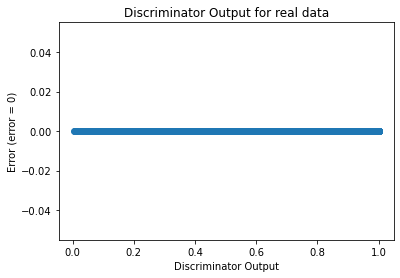

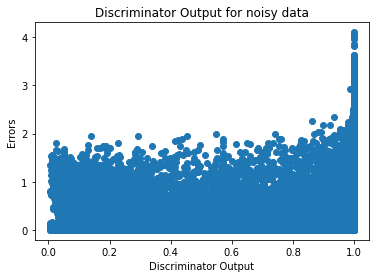

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)